In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [19]:
X = pd.read_csv('House_info_data.csv',encoding='gbk')
Y = pd.read_csv('House_price_data.csv',encoding='gbk')

In [20]:
Y.head()

,HOUSE_SRN,DATA_DATE,HIGHEST_PRICE,AVG_PRICE,LOWEST_PRICE
0,1,2004/3/5,NaN,6000.0,NaN
1,1,2012/3/9,5600.0,4850.0,4250.0
2,1,2014/7/1,5600.0,40782.0,4250.0
3,1,2014/12/1,NaN,35559.0,NaN
4,1,2015/1/1,NaN,35358.0,NaN


In [21]:
X.loc[X.PPTY_MGMT_TYPE == u'公寓','OWNERSHIP_PERIOD'] = '40年'
X.loc[X.PPTY_MGMT_TYPE == u'普通住宅','OWNERSHIP_PERIOD'] = '70年'
X.loc[X.OWNERSHIP_PERIOD == u'40年','PPTY_MGMT_TYPE'] = '公寓'
X.loc[X.OWNERSHIP_PERIOD == u'70年','PPTY_MGMT_TYPE'] = '普通住宅'
data = X.loc[:,['HOUSE_SRN','HOUSE_NAME','CITY','AREA','OWNERSHIP_PERIOD','PPTY_MGMT_TYPE']]
data.dropna(how='any')
data.head()

,HOUSE_SRN,HOUSE_NAME,CITY,AREA,OWNERSHIP_PERIOD,PPTY_MGMT_TYPE
0,1,建业苑,北京,朝阳,70年,普通住宅
1,2,濠景阁,北京,朝阳,40年,公寓
2,3,华清嘉园,北京,海淀,70年,普通住宅
3,4,城市芳庭,北京,丰台,70年,普通住宅
4,5,京香福苑,北京,东城,40年,公寓


In [22]:
Y.HOUSE_SRN = Y.HOUSE_SRN.astype(str)
total = pd.merge(data,Y,on="HOUSE_SRN",how='left')
total['DATA_DATE'] = pd.to_datetime(total['DATA_DATE'])
total['DATA_DATE_Y'] = total.DATA_DATE.dt.year
total['DATA_DATE_M'] = total.DATA_DATE.dt.month
total.head()

,HOUSE_SRN,HOUSE_NAME,CITY,AREA,OWNERSHIP_PERIOD,PPTY_MGMT_TYPE,DATA_DATE,HIGHEST_PRICE,AVG_PRICE,LOWEST_PRICE,DATA_DATE_Y,DATA_DATE_M
0,1,建业苑,北京,朝阳,70年,普通住宅,2004-03-05,NaN,6000.0,NaN,2004.0,3.0
1,1,建业苑,北京,朝阳,70年,普通住宅,2012-03-09,5600.0,4850.0,4250.0,2012.0,3.0
2,1,建业苑,北京,朝阳,70年,普通住宅,2014-07-01,5600.0,40782.0,4250.0,2014.0,7.0
3,1,建业苑,北京,朝阳,70年,普通住宅,2014-12-01,NaN,35559.0,NaN,2014.0,12.0
4,1,建业苑,北京,朝阳,70年,普通住宅,2015-01-01,NaN,35358.0,NaN,2015.0,1.0


In [23]:
total = total[total.AVG_PRICE.isnull() == False]
total = total[total['DATA_DATE_M'] > 0]
X = total.loc[:,['HOUSE_NAME','CITY','AREA','OWNERSHIP_PERIOD','PPTY_MGMT_TYPE','DATA_DATE','DATA_DATE_M','DATA_DATE_Y','AVG_PRICE']].dropna(how='any')

In [24]:
X[X['AREA'] == u'朝阳']#[X['DATA_DATE'] ]

,HOUSE_NAME,CITY,AREA,OWNERSHIP_PERIOD,PPTY_MGMT_TYPE,DATA_DATE,DATA_DATE_M,DATA_DATE_Y,AVG_PRICE
0,建业苑,北京,朝阳,70年,普通住宅,2004-03-05,3.0,2004.0,6000.0
1,建业苑,北京,朝阳,70年,普通住宅,2012-03-09,3.0,2012.0,4850.0
2,建业苑,北京,朝阳,70年,普通住宅,2014-07-01,7.0,2014.0,40782.0
3,建业苑,北京,朝阳,70年,普通住宅,2014-12-01,12.0,2014.0,35559.0
4,建业苑,北京,朝阳,70年,普通住宅,2015-01-01,1.0,2015.0,35358.0
5,建业苑,北京,朝阳,70年,普通住宅,2015-02-01,2.0,2015.0,36718.0
6,建业苑,北京,朝阳,70年,普通住宅,2015-03-01,3.0,2015.0,36721.0
7,建业苑,北京,朝阳,70年,普通住宅,2015-04-01,4.0,2015.0,36717.0
8,建业苑,北京,朝阳,70年,普通住宅,2015-05-01,5.0,2015.0,36143.0
9,建业苑,北京,朝阳,70年,普通住宅,2015-06-01,6.0,2015.0,37222.0


     DATA_DATE_M  DATA_DATE_Y     AVG_PRICE
0            1.0       2004.0   7162.142857
1            1.0       2005.0   8701.757576
2            1.0       2006.0  10485.500000
3            1.0       2007.0  13795.058824
4            1.0       2008.0  19218.750000
5            1.0       2009.0  20562.500000
6            1.0       2010.0  26463.333333
7            1.0       2011.0  35811.538462
8            1.0       2012.0  36700.000000
9            1.0       2013.0  44990.697674
10           1.0       2014.0  52000.000000
11           1.0       2015.0  39220.799634
12           1.0       2016.0  40723.344901
13           2.0       2004.0   5897.000000
14           2.0       2005.0   8730.769231
15           2.0       2006.0   9807.083333
16           2.0       2007.0  12002.461538
17           2.0       2008.0  20981.818182
18           2.0       2009.0  17146.153846
19           2.0       2010.0  32764.705882
20           2.0       2011.0  40700.000000
21           2.0       2012.0  4

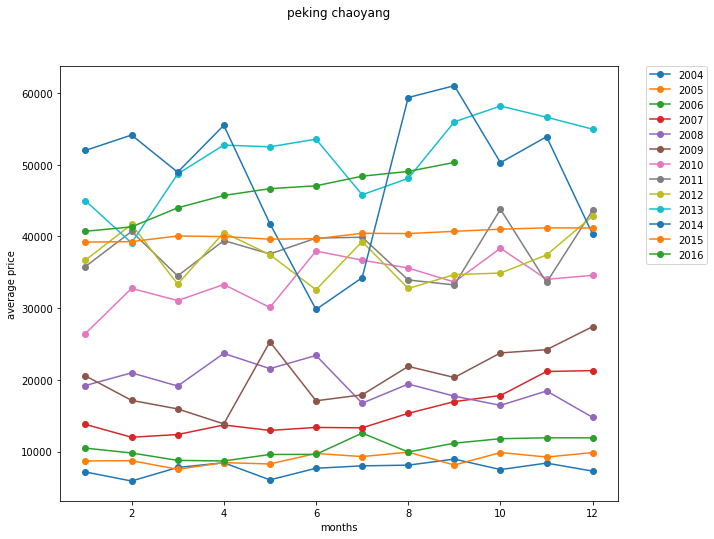

In [25]:
samp = X[X['AREA'] == u'朝阳'].groupby(['DATA_DATE_M','DATA_DATE_Y']).mean().reset_index()

print samp


title = plt.title(u'peking chaoyang')
title.set_y(1.1)
plt.ylabel('average price')
plt.xlabel('months')

lege = []
y = []
for year in range(2004,2017):
    length = samp[samp['DATA_DATE_Y'] == year].shape[0]
    a = samp[samp['DATA_DATE_Y'] == year].DATA_DATE_M.values.reshape(length, 1)
    b = samp[samp['DATA_DATE_Y'] == year].AVG_PRICE.values.reshape(length, 1)
    plt.plot(a,b,'-o',label=str(year))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
#X[X['DATA_DATE'] == 2]

In [27]:
print samp

     DATA_DATE_M  DATA_DATE_Y     AVG_PRICE
0            1.0       2004.0   7162.142857
1            1.0       2005.0   8701.757576
2            1.0       2006.0  10485.500000
3            1.0       2007.0  13795.058824
4            1.0       2008.0  19218.750000
5            1.0       2009.0  20562.500000
6            1.0       2010.0  26463.333333
7            1.0       2011.0  35811.538462
8            1.0       2012.0  36700.000000
9            1.0       2013.0  44990.697674
10           1.0       2014.0  52000.000000
11           1.0       2015.0  39220.799634
12           1.0       2016.0  40723.344901
13           2.0       2004.0   5897.000000
14           2.0       2005.0   8730.769231
15           2.0       2006.0   9807.083333
16           2.0       2007.0  12002.461538
17           2.0       2008.0  20981.818182
18           2.0       2009.0  17146.153846
19           2.0       2010.0  32764.705882
20           2.0       2011.0  40700.000000
21           2.0       2012.0  4

In [31]:
s1=samp[samp['DATA_DATE_M']==1.0]
s1

,DATA_DATE_M,DATA_DATE_Y,AVG_PRICE
0,1.0,2004.0,7162.142857
1,1.0,2005.0,8701.757576
2,1.0,2006.0,10485.500000
3,1.0,2007.0,13795.058824
4,1.0,2008.0,19218.750000
5,1.0,2009.0,20562.500000
6,1.0,2010.0,26463.333333
7,1.0,2011.0,35811.538462
8,1.0,2012.0,36700.000000
9,1.0,2013.0,44990.697674


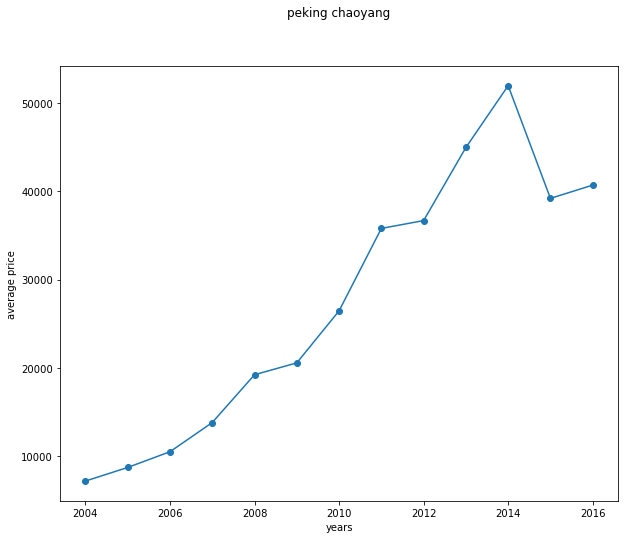

In [35]:
title = plt.title(u'peking chaoyang')
title.set_y(1.1)
plt.ylabel('average price')
plt.xlabel('years')

lege = []
y = []

length = s1.shape[0]
x = s1.DATA_DATE_Y.values.reshape(length,1)
y = s1.AVG_PRICE.values.reshape(length,1)
plt.plot(x,y,'-o',label='')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)